# Seleção, treino e teste de modelos

Com o dataset limpo e feature engenearing realizada, prosseguimos para a seleção de modelos, treino e teste.

In [1]:
RANDOM_SEED = 42

In [2]:
import pickle
import pathlib

import numpy as np
import pandas as pd

In [3]:
# Importando o dataset
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

c:\Users\rodri\Documents\Rodrigo\Insper\OitavoSemestre\mlops\24-2-mlops-project-grupo_de_hardware\data


In [4]:
clean_data_path = DATA_DIR / 'processed' / 'ames_eng.pkl'
clean_data_path

WindowsPath('c:/Users/rodri/Documents/Rodrigo/Insper/OitavoSemestre/mlops/24-2-mlops-project-grupo_de_hardware/data/processed/ames_eng.pkl')

In [5]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 2929
Columns: 165 entries, Lot.Frontage to Exterior_Other
dtypes: bool(124), float64(29), int64(12)
memory usage: 518.8 KB


In [7]:
model_data = data.copy()
model_data.head()

,Lot.Frontage,Lot.Area,Lot.Shape,Land.Slope,Overall.Qual,Overall.Cond,Mas.Vnr.Area,Exter.Qual,Exter.Cond,BsmtFin.SF.1,...,Exterior_BrkFace,Exterior_CemntBd,Exterior_HdBoard,Exterior_MetalSd,Exterior_Plywood,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,Exterior_Other
0,141.0,10.366278,1,0,3,3,4.718499,2,2,639.0,...,True,False,False,False,False,False,False,False,False,False
2,81.0,9.565704,1,0,3,4,4.682131,2,2,923.0,...,False,False,False,False,False,False,False,True,False,False
5,78.0,9.208138,1,0,3,4,2.995732,2,2,602.0,...,False,False,False,False,False,False,True,False,False,False
15,47.0,10.887512,2,1,5,3,6.401917,0,2,1416.0,...,False,True,False,False,False,False,False,False,False,False
17,88.0,9.340842,0,0,6,0,5.857933,1,2,1445.0,...,False,False,False,False,False,False,True,False,False,False


In [8]:
X = model_data.drop(columns=['SalePrice']).copy()
y = model_data['SalePrice'].copy()

In [9]:
X.values, y.values

(array([[141.0, 10.366277727263562, 1, ..., False, False, False],
        [81.0, 9.565704457114814, 1, ..., True, False, False],
        [78.0, 9.208137948420983, 1, ..., False, False, False],
        ...,
        [32.0, 8.411832675758411, 0, ..., False, False, False],
        [80.0, 9.50181524266666, 0, ..., False, False, False],
        [74.0, 9.172326929777967, 0, ..., False, False, False]],
       dtype=object),
 array([5.33243846, 5.23552845, 5.29114676, ..., 5.18610838, 5.14612804,
        5.27415785]))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Separando os dados em treino e teste
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=RANDOM_SEED,
)


In [12]:
X.shape, Xtrain.shape, Xtest.shape

((1155, 164), (866, 164), (289, 164))

In [13]:
y.shape, ytrain.shape, ytest.shape

((1155,), (866,), (289,))

## 1. Seleção de modelos

Primeiramente, é importante ressaltar, que o método de avaliação escolhido foi o RMSE (Root Mean Squared Error), com este método, é possível avaliar o erro médio quadrático, ou seja, a diferença entre o valor real e o valor previsto pelo modelo.

Para a primeira etapa seleção de modelos, foram escolhidos os seguintes modelos:

* Random Forest Regressor
* Decision Tree Regressor

Para essa avalização nós utilizaremos o grid search, que é uma técnica de busca em grade, que nos permite testar diferentes combinações de hiperparâmetros, para encontrar a melhor combinação para o modelo.

E em seguida utilizaremos o método de validação cruzada, que é uma técnica que nos permite avaliar o modelo, utilizando diferentes divisões do dataset, para que o modelo não seja treinado e testado com os mesmos dados.

Com isso, podemos avaliar o modelo com diferentes divisões do dataset, e com diferentes combinações de hiperparâmetros, para encontrar a melhor combinação  e assim poder comparar os modelos em seu melhor desempenho.

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV



grid_search_forest = GridSearchCV(
    RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEED, n_jobs=-1),
    {'n_estimators': [300, 675, 900]},
    cv=4, 
    n_jobs=-1, 
    scoring='neg_mean_squared_error', 
    return_train_score=True
)

grid_search_tree = GridSearchCV(
    DecisionTreeRegressor(random_state=RANDOM_SEED),
    {'max_depth': [3, 5, 7]},
    cv=4,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    return_train_score=True
)


In [15]:
grid_search_forest.fit(Xtrain, ytrain)
forest_reg = grid_search_forest.best_estimator_
forest_reg_scores = cross_val_score(forest_reg, Xtrain, ytrain, 
                                    scoring="neg_mean_squared_error", cv=8, n_jobs=-1)
forest_reg_rmse_scores = np.sqrt(-forest_reg_scores)

c:\Users\rodri\Documents\Rodrigo\Insper\OitavoSemestre\mlops\24-2-mlops-project-grupo_de_hardware\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [16]:
grid_search_tree.fit(Xtrain, ytrain)
tree_reg = grid_search_tree.best_estimator_
tree_reg_scores = cross_val_score(tree_reg, Xtrain, ytrain, 
                                  scoring="neg_mean_squared_error", cv=8, n_jobs=-1)
tree_reg_rmse_scores = np.sqrt(-tree_reg_scores)

In [17]:
print("Random Forest Regressor:")
print(forest_reg_rmse_scores)
print(forest_reg_rmse_scores.mean())
print("\nDecision Tree Regressor:")
print(tree_reg_rmse_scores)
print(tree_reg_rmse_scores.mean())

Random Forest Regressor:
[0.05932971 0.05107048 0.06572998 0.04770354 0.05415307 0.04838398
 0.05254207 0.05546602]
0.0542973551013618

Decision Tree Regressor:
[0.079991   0.07679102 0.08682637 0.06775744 0.06798778 0.07696833
 0.07306456 0.06935189]
0.07484229880772471


In [18]:
mean_scores = forest_reg_rmse_scores.mean()
# uma vez que o target está em log, precisamos fazer a transformação inversa
mean_scores = (10**mean_scores - 1) * 100
print(mean_scores)

13.317596674999187


In [19]:
mean_scores = tree_reg_rmse_scores.mean()
# uma vez que o target está em log, precisamos fazer a transformação inversa
mean_scores = (10**mean_scores - 1) * 100
print(mean_scores)

18.807073636193074


## 2. teste de hiótese

Os resultados do Random Forest Regressor a principio se mostraram melhores do que os resultados do Decision Tree Regressor, porém, para se ter certeza, é necessário realizar o teste de hipótese.

Os testes de hipótese a serem realizados são:

* Teste Paramétrico
* Teste U de Mann-Whitney


In [20]:
# testando um teste parametrico
from scipy.stats import ttest_ind

def compara_scores(scores_1, scores_2):
    t_stat, p_value = ttest_ind(scores_1, scores_2, equal_var=False)
    print("Valor da estatística t: {:.2f}".format(t_stat))
    print("Valor-p: {}".format(p_value))

In [21]:
from scipy.stats import mannwhitneyu

U, p_value = mannwhitneyu(forest_reg_rmse_scores, tree_reg_rmse_scores)
print('U =', U)
print('p-value =', p_value)

U = 0.0
p-value = 0.0001554001554001554


In [22]:
compara_scores(forest_reg_rmse_scores, tree_reg_rmse_scores)

Valor da estatística t: -6.51
Valor-p: 1.4642051802165798e-05


Com base nos resultados dos testes de hipótese, podemos concluir que o modelo Random Forest Regressor é o melhor modelo para o problema em questão.

## 3. Novos testes e experimentos

In [23]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [24]:
def outro_experimento(msg, pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_pred, y_test))

    print(f'{msg}:')
    print(f'RMSE: {RMSE}')
    print()

In [25]:
poly_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('std_scaler', StandardScaler()),
    ('reg', forest_reg)
])

In [26]:
# outro_experimento('Random Forest com PolynomialFeatures', poly_reg, Xtrain, ytrain, Xtest, ytest)

Como não conseguims observar nenhum benefício em utilizar polimal features, descartamos essa técnica.

### Teste com stacking regressor

para o teste com stacking regressor, utilizamos os seguintes modelos:

* Random Forest Regressor
* Lasso
* Gradient Boosting Regressor
* Ridge ( como regresssor final)

A escolha foi feita com base nos modelos que mais se encaixavam em nosso problema

In [27]:
# stacking regressors -> Random Forest + Decision Tree + Lasso
from sklearn.ensemble import StackingRegressor
# import gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# Grid search for Gradient Boosting Regressor
grid_search_gbr = GridSearchCV(
    GradientBoostingRegressor(random_state=RANDOM_SEED),
    {'n_estimators': [100, 600, 900], 'max_depth': [3, 5, 7]},
    cv=4,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

grid_search_gbr.fit(Xtrain, ytrain)
gbr_reg = grid_search_gbr.best_estimator_
print(gbr_reg)


GradientBoostingRegressor(n_estimators=600, random_state=42)


In [28]:
gbr_reg

GradientBoostingRegressor(n_estimators=600, random_state=42)

In [29]:
# Lasso GridSearch
grid_search_lasso = GridSearchCV(
    Lasso(random_state=RANDOM_SEED),
    {'alpha': [0.1,0.5,1]},
    cv=4,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

grid_search_lasso.fit(Xtrain, ytrain)
lasso_reg = grid_search_lasso.best_estimator_
print(lasso_reg)

Lasso(alpha=0.1, random_state=42)


In [30]:

estimators = [
    ('rf', forest_reg),
    ('ls', lasso_reg),
    ('gb', gbr_reg)
    
]

stack_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge()
)

outro_experimento('Stacking Regressor', stack_reg, Xtrain, ytrain, Xtest, ytest)


Stacking Regressor:
RMSE: 0.05396651819826186



In [31]:
# Cross Validation of Stacking Regressor
from sklearn.model_selection import cross_val_score

stack_reg_scores = cross_val_score(stack_reg, Xtrain, ytrain,
                                      scoring="neg_mean_squared_error", cv=8, n_jobs=-1)    
stack_reg_rmse_scores = np.sqrt(-stack_reg_scores)

print(stack_reg_rmse_scores)
print(stack_reg_rmse_scores.mean())


[0.0512146  0.04655938 0.0610755  0.04005026 0.05436454 0.04097232
 0.04678887 0.05540676]
0.04955402747780155


In [32]:
mean_scores = stack_reg_rmse_scores.mean()
# uma vez que o target está em log, precisamos fazer a transformação inversa
mean_scores = (10**mean_scores - 1) * 100
print(mean_scores)

12.086685651192997


In [33]:
compara_scores(stack_reg_rmse_scores, forest_reg_rmse_scores )

Valor da estatística t: -1.42
Valor-p: 0.17768993376500447


In [34]:
# Teste U de Mann-Whitney

U, p_value = mannwhitneyu(stack_reg_rmse_scores, forest_reg_rmse_scores)
print('U =', U)
print('p-value =', p_value)


U = 20.0
p-value = 0.23449883449883446


Os resultados do Stacking Regressor se mostraram um pouco melhorem do que o Random Forest, apesar disso não foi possível comprovar que um deles seja melhor.

Foi decidido então que continuaremos com o stacking regressor devido ao seu desempenho médio ser melhor.

## 4. avaliação de importância das features

Como o stacking regressor não suporta a função feature_importances_, foram analizadas as importancias através dos modelos indiviuais ue a suportavam, e então realizada a média

Text(0.5, 1.0, 'Feature Importance (MDI)')

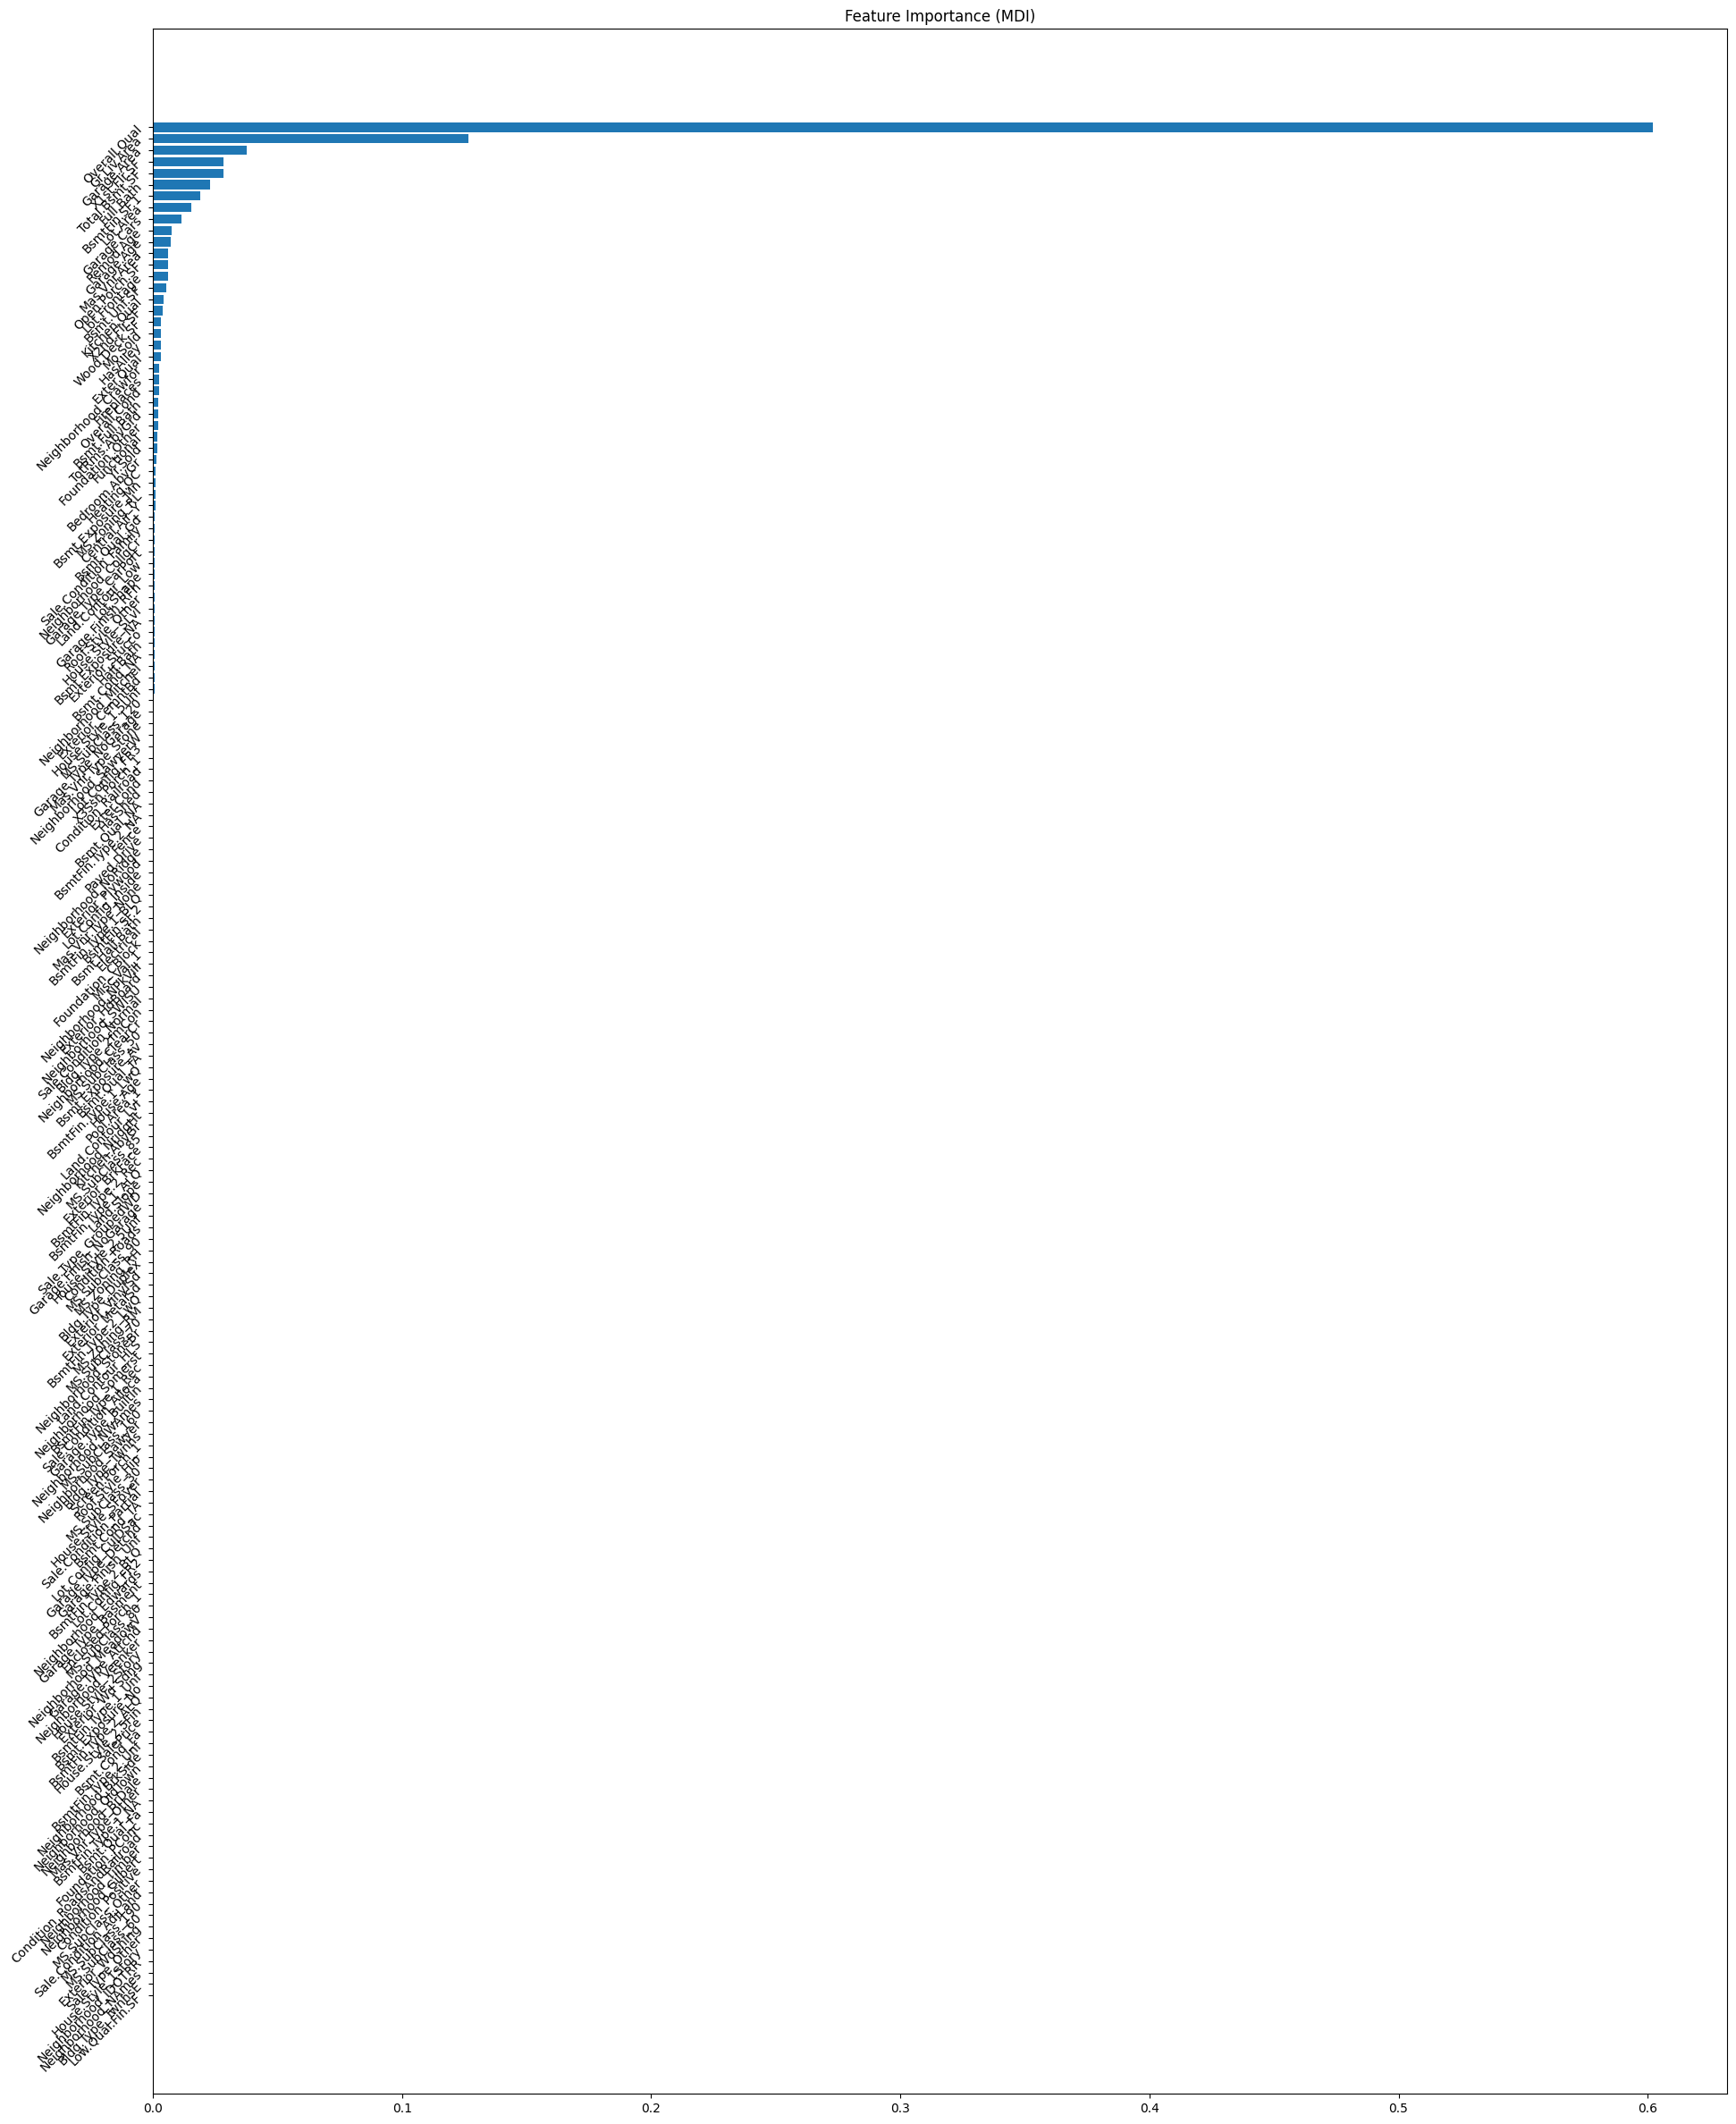

In [35]:
import matplotlib.pyplot as plt


feature_importance_forest = forest_reg.feature_importances_
sorted_idx = np.argsort(feature_importance_forest)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(50, 30))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance_forest[sorted_idx], align="center")
plt.yticks(pos, np.array(model_data.columns)[sorted_idx], rotation=45, ha="right")
plt.title("Feature Importance (MDI)")

Text(0.5, 1.0, 'Feature Importance (MDI)')

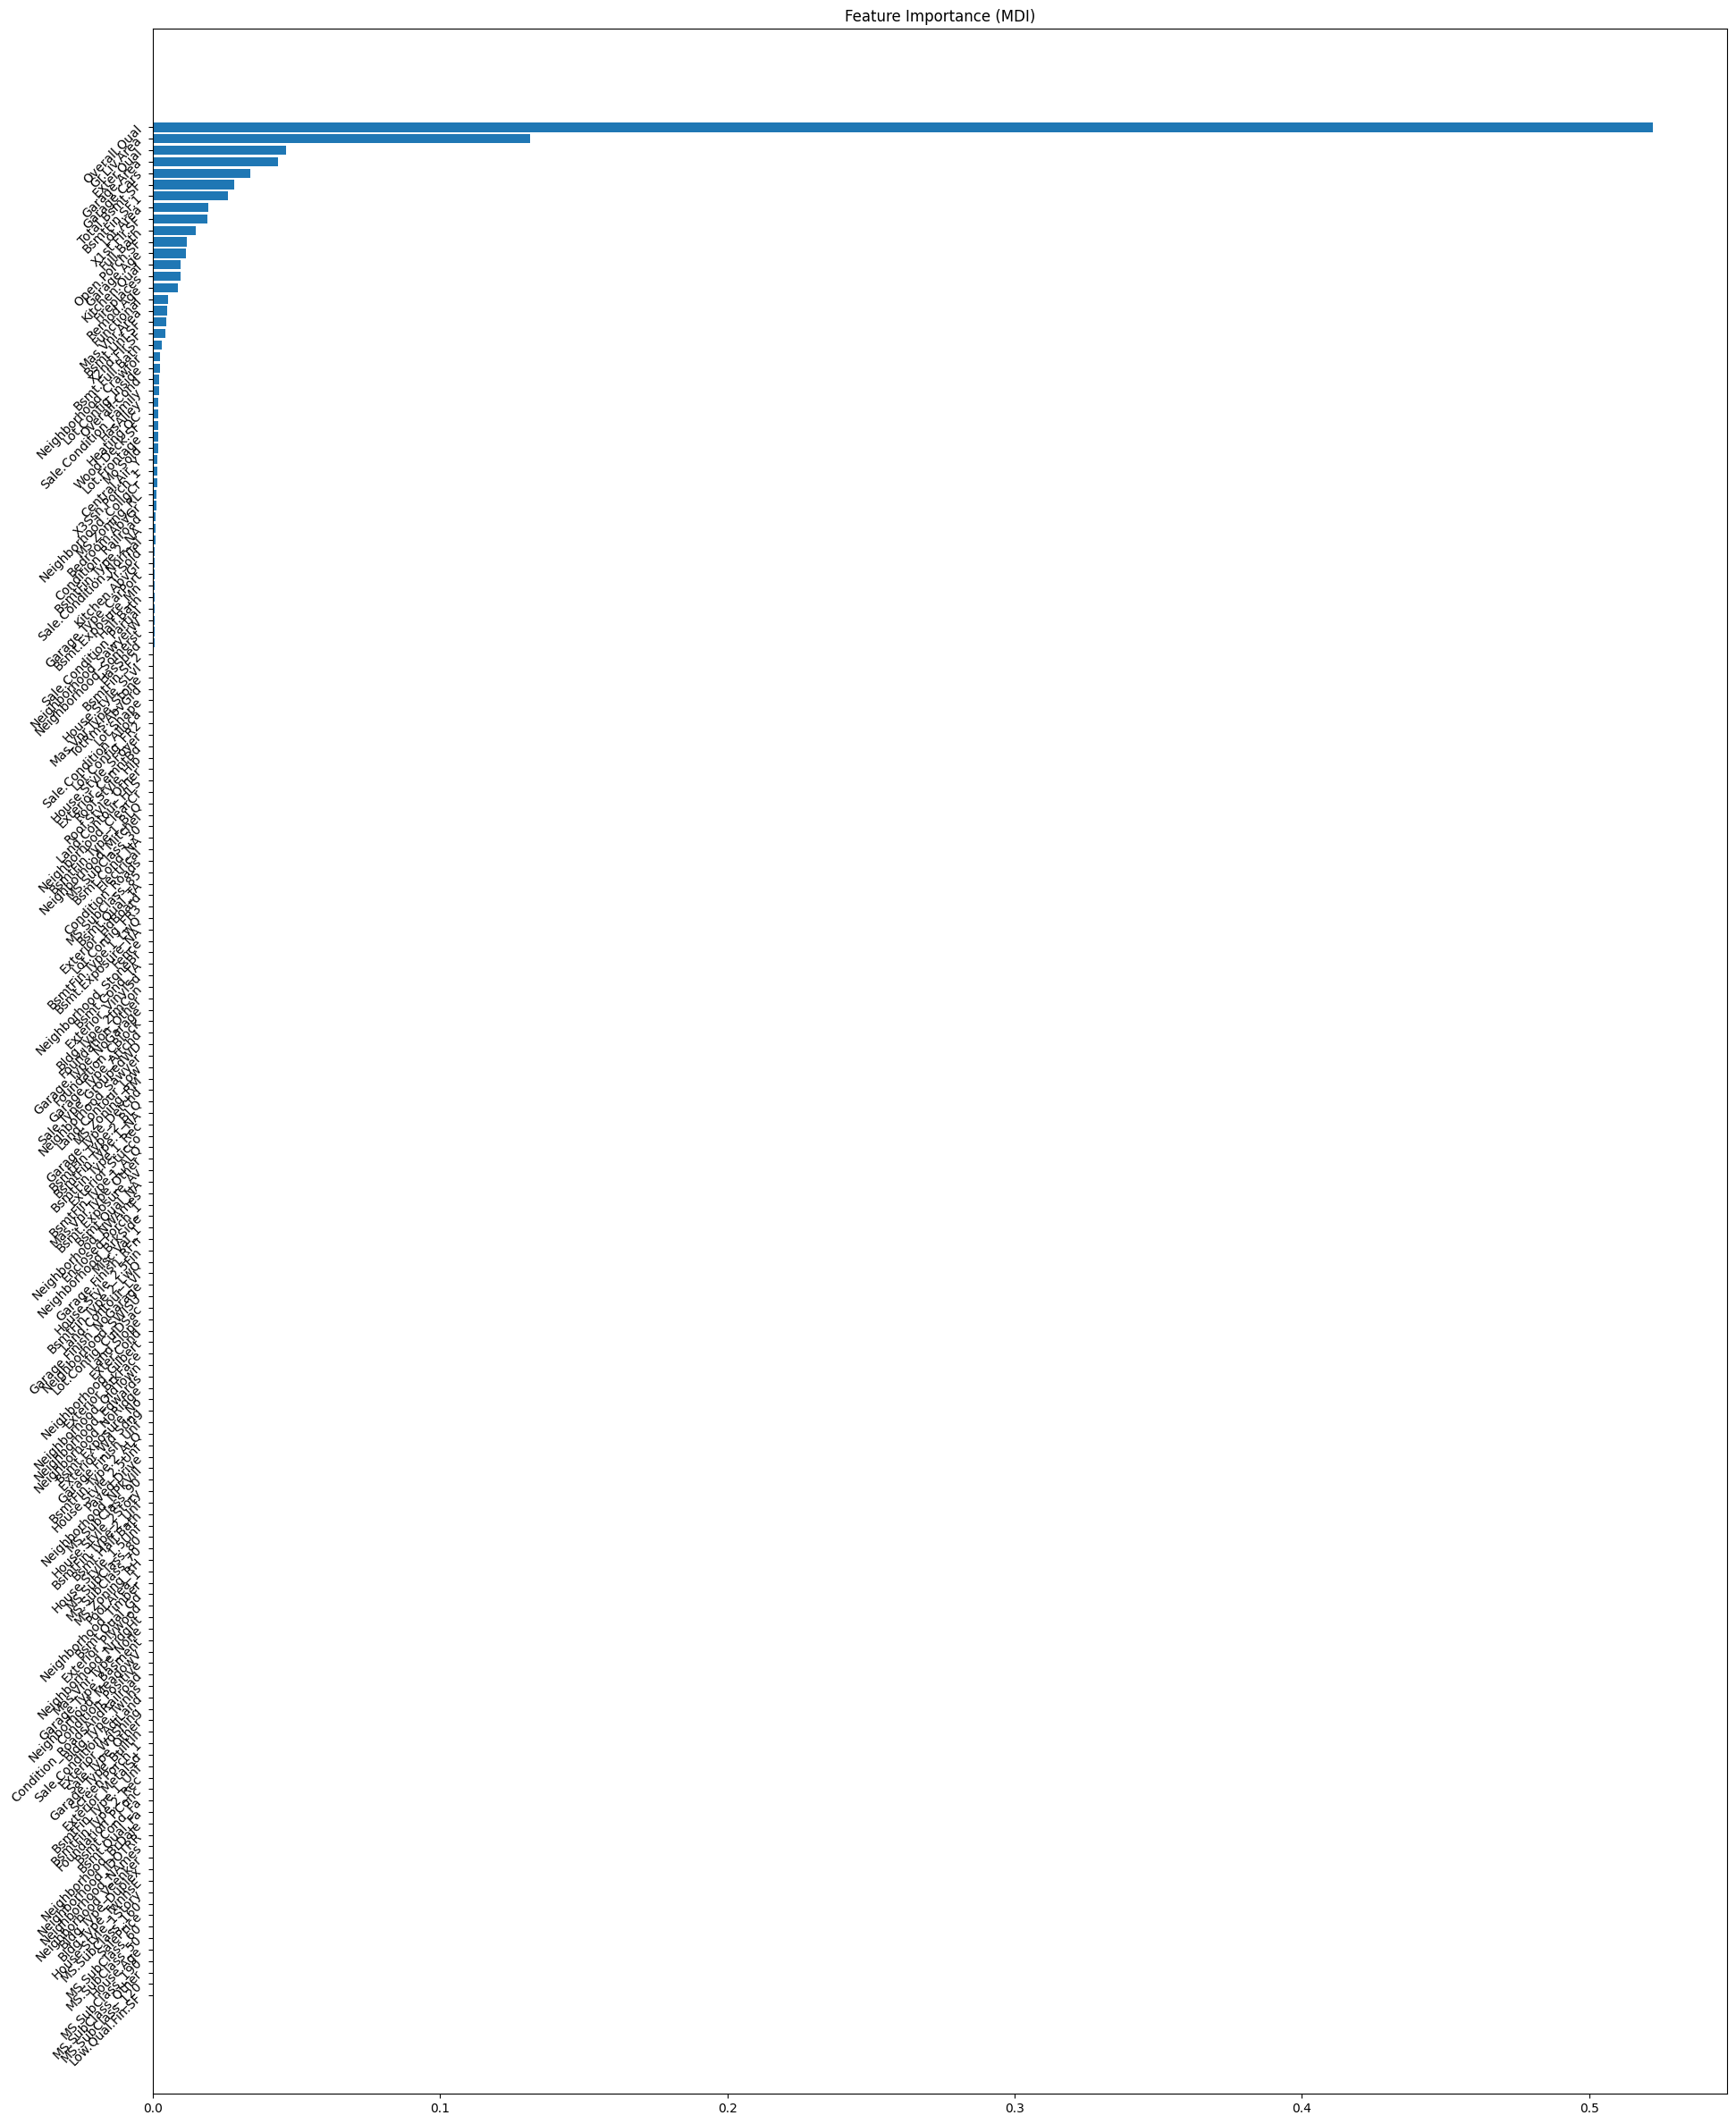

In [36]:
feature_importance_gbr = gbr_reg.feature_importances_
sorted_idx = np.argsort(feature_importance_gbr)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(50, 30))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance_gbr[sorted_idx], align="center")
plt.yticks(pos, np.array(model_data.columns)[sorted_idx], rotation=45, ha="right")
plt.title("Feature Importance (MDI)")

Text(0.5, 1.0, 'Feature Importance (MDI)')

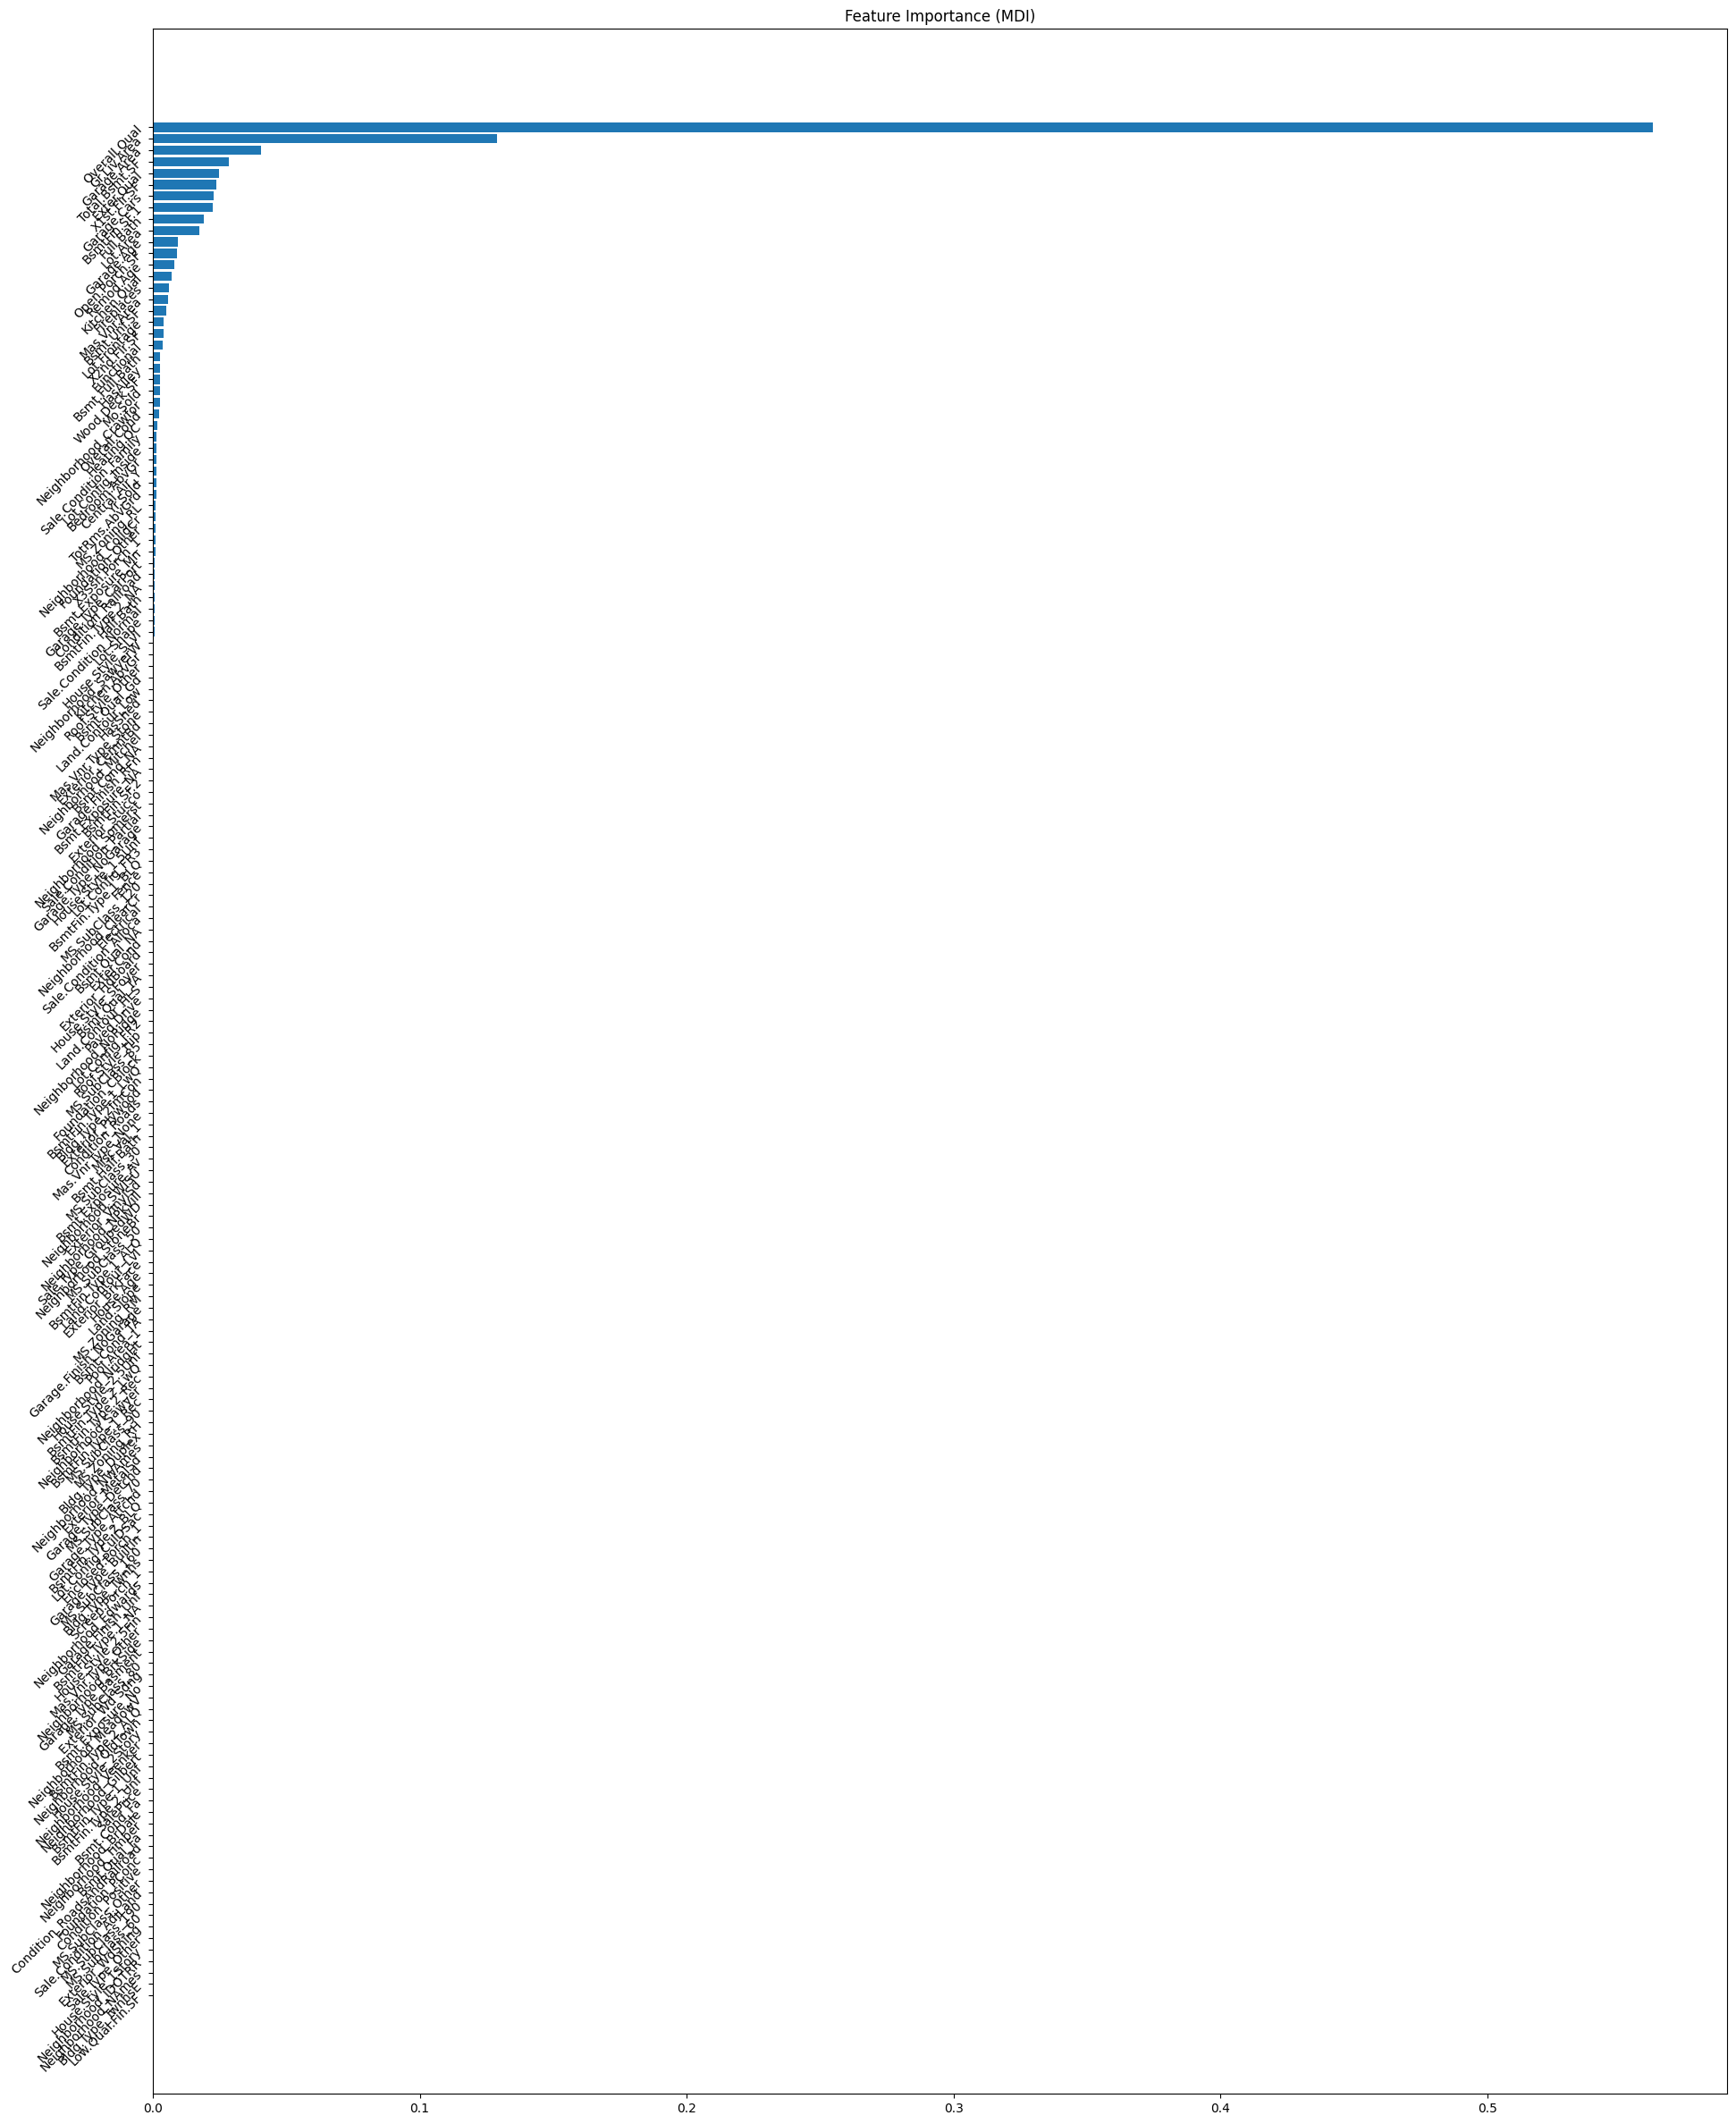

In [37]:
# Faz a média da importância das features
feature_importance = (feature_importance_forest + feature_importance_gbr) / 2
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(50, 30))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(model_data.columns)[sorted_idx], rotation=45, ha="right")
plt.title("Feature Importance (MDI)")



In [38]:
# Filtra as 10 features mais importantes
top_15_features = np.array(model_data.columns)[sorted_idx][-15:]
top_15_features


array(['Fireplaces', 'Kitchen.Qual', 'Remod.Age', 'Open.Porch.SF',
       'Garage.Age', 'Lot.Area', 'Full.Bath', 'BsmtFin.SF.1',
       'Garage.Cars', 'X1st.Flr.SF', 'Exter.Qual', 'Total.Bsmt.SF',
       'Garage.Area', 'Gr.Liv.Area', 'Overall.Qual'], dtype=object)

In [39]:
# print the 15 most important features and their importance score
print('Feature Importance Score')
print('------------------------')
for i,v in enumerate(feature_importance[sorted_idx][-15:]):
    print(f'Feature: {top_15_features[i]}, Score: {v}')
    

Feature Importance Score
------------------------
Feature: Fireplaces, Score: 0.006042984660342584
Feature: Kitchen.Qual, Score: 0.0070231624244881255
Feature: Remod.Age, Score: 0.008060787713881896
Feature: Open.Porch.SF, Score: 0.009075628088033468
Feature: Garage.Age, Score: 0.009386579507427977
Feature: Lot.Area, Score: 0.017304106689215087
Feature: Full.Bath, Score: 0.018960143152647695
Feature: BsmtFin.SF.1, Score: 0.02258983156478106
Feature: Garage.Cars, Score: 0.02266038550784215
Feature: X1st.Flr.SF, Score: 0.02372488888560581
Feature: Exter.Qual, Score: 0.024799190979309122
Feature: Total.Bsmt.SF, Score: 0.02831355317431797
Feature: Garage.Area, Score: 0.040586443638064476
Feature: Gr.Liv.Area, Score: 0.12889878419803666
Feature: Overall.Qual, Score: 0.5619582010157527


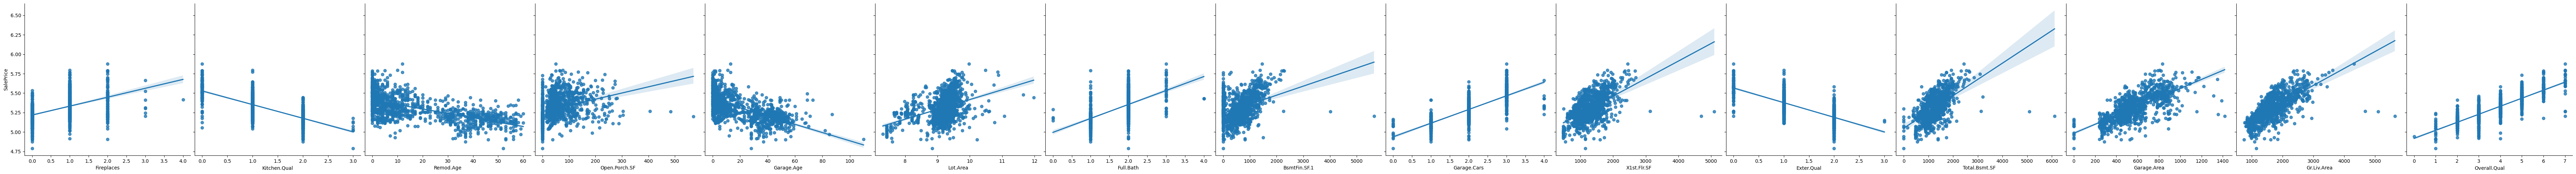

In [40]:
# faz o gráfico de dispersão das 15 features mais importantes
import seaborn as sns

sns.pairplot(model_data, x_vars=top_15_features, y_vars='SalePrice', height=5, aspect=1, kind='reg')


Com isso foi possível descobrir quais são as os principais fatores que influenciam o preço de venda dos imóveis e também se a influencia é negativa ou positiva e sua intensidade.

### Experimento

Neste experimento será feito um dataset utilizando apenas as 15 features mais importantes e uma feature cuja representa a junção delas, com o objetivo de validar o impacto dessas features no modelo com stacking regressor.

Este experimento serve também para verificar se há a possibilidade de redução consideravel no número de features sem afetar consideravelmente a performance do modelo, para que este seja aplicado em um caso em que a velocidade de treino seja importante.

In [41]:
# cria um dataframe com as 10 features mais importantes
top_15_features_df = model_data[top_15_features].copy()
top_15_features_df.head()

# cria um dataframe com as 10 features mais importantes e o target
top_15_features_df = model_data[top_15_features].copy()
top_15_features_df['SalePrice'] = model_data['SalePrice'].copy()
top_15_features_df.corr()


,Fireplaces,Kitchen.Qual,Remod.Age,Open.Porch.SF,Garage.Age,Lot.Area,Full.Bath,BsmtFin.SF.1,Garage.Cars,X1st.Flr.SF,Exter.Qual,Total.Bsmt.SF,Garage.Area,Gr.Liv.Area,Overall.Qual,SalePrice
Fireplaces,1.000000,-0.213314,-0.094401,0.163050,-0.017007,0.368566,0.190709,0.267094,0.295256,0.423584,-0.203238,0.322233,0.309936,0.448689,0.312112,0.442013
Kitchen.Qual,-0.213314,1.000000,0.685026,-0.233711,0.652295,-0.139978,-0.417115,-0.260268,-0.540805,-0.401652,0.782364,-0.455033,-0.526588,-0.452143,-0.746551,-0.723308
Remod.Age,-0.094401,0.685026,1.000000,-0.231975,0.847372,0.018150,-0.509303,-0.130663,-0.531764,-0.254393,0.698310,-0.310767,-0.454472,-0.327383,-0.663694,-0.614362
Open.Porch.SF,0.163050,-0.233711,-0.231975,1.000000,-0.204303,0.237667,0.241727,0.159732,0.225352,0.257324,-0.236654,0.256528,0.261365,0.366281,0.266082,0.306571
Garage.Age,-0.017007,0.652295,0.847372,-0.204303,1.000000,0.089621,-0.538570,-0.130023,-0.589690,-0.246860,0.720825,-0.354866,-0.511093,-0.310726,-0.694978,-0.611659
Lot.Area,0.368566,-0.139978,0.018150,0.237667,0.089621,1.000000,0.176127,0.233018,0.302063,0.481063,-0.095123,0.402311,0.389631,0.435390,0.195007,0.408279
Full.Bath,0.190709,-0.417115,-0.509303,0.241727,-0.538570,0.176127,1.000000,0.047895,0.499384,0.316831,-0.442787,0.307355,0.398054,0.585956,0.529336,0.562066
BsmtFin.SF.1,0.267094,-0.260268,-0.130663,0.159732,-0.130023,0.233018,0.047895,1.000000,0.213849,0.469394,-0.247759,0.524424,0.301698,0.244617,0.264098,0.360454
Garage.Cars,0.295256,-0.540805,-0.531764,0.225352,-0.589690,0.302063,0.499384,0.213849,1.000000,0.436740,-0.554291,0.450933,0.863198,0.540429,0.643923,0.730184
X1st.Flr.SF,0.423584,-0.401652,-0.254393,0.257324,-0.246860,0.481063,0.316831,0.469394,0.436740,1.000000,-0.412905,0.876817,0.526218,0.524376,0.496285,0.567950


In [ ]:
# save the dataframe with the 15 most important features
top_15_features_df.to_pickle(DATA_DIR / 'processed' / 'top_15_features.pkl')

# Teste das alterações

In [42]:
# train test split
X = top_15_features_df.drop(columns=['SalePrice']).copy()
y = top_15_features_df['SalePrice'].copy()

Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=RANDOM_SEED,
)

In [43]:
# testa o modelo de stacking regressor só com as 15 features mais importantes e a nova feature criada

stack_reg_scores = cross_val_score(stack_reg, Xtrain2, ytrain2,
                                      scoring="neg_mean_squared_error", cv=8, n_jobs=-1)    
stack_reg_rmse_scores = np.sqrt(-stack_reg_scores)

print(stack_reg_rmse_scores)
print(stack_reg_rmse_scores.mean())

[0.05492603 0.04794858 0.06333156 0.04481943 0.05554238 0.04590712
 0.04982022 0.06170933]
0.053000581886719286


In [44]:
# converte o resultado para o valor original
mean_scores = stack_reg_rmse_scores.mean()
mean_scores = (10**mean_scores - 1) * 100
print(mean_scores)

12.97974284237342


Foi possível notar que o desempenho médio do modelo foi um pouco pior, mas a velocidade de treino aumento significativamente.

O fato de que a performance, apesar de um pouco pior, se aproximar do desempenho com todo o dataset mostra, que as features selecionadas realmente possuem um impacto significativo e seria possível reduzir a coleta de dados a apensas estas se necessário.

## 5. Teste Final 

In [45]:
# Testa o modelo de stacking regressor com o conjunto de teste
stack_reg.fit(Xtrain, ytrain)
y_pred = stack_reg.predict(Xtest)
RMSE = np.sqrt(mean_squared_error(y_pred, ytest))

print(f'Stacking Regressor:')
print(f'RMSE: {RMSE}')


Stacking Regressor:
RMSE: 0.05396651819826181


In [46]:
# converte o resultado para o valor original
RMSE = (10**RMSE - 1) * 100
print(f'RMSE: {RMSE}')

RMSE: 13.231306453720304


## 6. Conclusão do teste

O teste final apresetou um erro de aproximadamente 13.3%, pouco mais de 1.2% maior do que o treino, oque indica que houve baixo overfitting, porém com um grande valor percentual, este modelo pode apresentar alto erro absoluto com imóveis de valores muito altos, porém desempenhará adequadamente para imóveis de valor baixo e médio.


## 7. Treinamento com todo o dataset

Com o modelo final escolhido, foi realizado o treino com todo o dataset, para que o modelo possa ser utilizado em produção.


In [47]:
#Criação do modelo final
stack_reg_final = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge()
)

stack_reg_final.fit(X, y)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(n_estimators=900,
                                                     n_jobs=-1,
                                                     random_state=42)),
                              ('ls', Lasso(alpha=0.1, random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(n_estimators=600,
                                                         random_state=42))],
                  final_estimator=Ridge())

In [48]:
pickle_model = open("../models/stack_reg.pkl","wb")
pickle.dump(stack_reg, pickle_model)
pickle_model.close()